In [475]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
from typing import List

In [476]:
plt.style.use('dark_background')

In [477]:
train_data = pd.read_csv(r"C:\Users\User\Desktop\Projects\Kaggle\Kaggle_Tasks\Mental_Health\data\train.csv",
                        index_col='id')

In [478]:
train_data.head()

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
id,,,,,,,,,,,,,,,,,,,
0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [479]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140700 entries, 0 to 140699
Data columns (total 19 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Name                                   140700 non-null  object 
 1   Gender                                 140700 non-null  object 
 2   Age                                    140700 non-null  float64
 3   City                                   140700 non-null  object 
 4   Working Professional or Student        140700 non-null  object 
 5   Profession                             104070 non-null  object 
 6   Academic Pressure                      27897 non-null   float64
 7   Work Pressure                          112782 non-null  float64
 8   CGPA                                   27898 non-null   float64
 9   Study Satisfaction                     27897 non-null   float64
 10  Job Satisfaction                       112790 non-null  float

In [480]:
train_data.describe()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


# Nulls

## Drop Columns w/ Nulls Over Threshold

In [481]:
def drop_over_thrsld_nulls_cols(data: pd.DataFrame, nulls_threshold: float = 0.45):
    nulls_proportion = data.isnull().sum() / len(data)
    nulls_more_thrsld = nulls_proportion[nulls_proportion.ge(nulls_threshold)].index.tolist()
    nulls_less_thrsld = nulls_proportion[nulls_proportion.lt(nulls_threshold)].index.tolist()
    print(f"By the threshold: {nulls_threshold}\nDropped the next columns:\n{nulls_proportion[nulls_more_thrsld]}")
    data.drop(nulls_more_thrsld, axis=1, inplace=True)

In [482]:
drop_over_thrsld_nulls_cols(train_data)

By the threshold: 0.45
Dropped the next columns:
Academic Pressure     0.801727
CGPA                  0.801720
Study Satisfaction    0.801727
dtype: float64


## Handle Nulls

In [483]:
cols_w_nulls = train_data.columns[train_data.isnull().any()].tolist()

In [484]:
with_nulls = train_data[cols_w_nulls].isnull().sum() / len(train_data[cols_w_nulls])
with_nulls._name = "proportion_of_nulls"
with_nulls

Profession          0.260341
Work Pressure       0.198422
Job Satisfaction    0.198365
Dietary Habits      0.000028
Degree              0.000014
Financial Stress    0.000028
Name: proportion_of_nulls, dtype: float64

### Categorical Features

In [485]:
temp_cat_nulls_df = pd.merge(train_data[with_nulls.index.tolist()].describe(include=['O']).T, with_nulls, left_index=True, right_index=True)
temp_cat_nulls_df

,count,unique,top,freq,proportion_of_nulls
Profession,104070,64,Teacher,24906,0.260341
Dietary Habits,140696,23,Moderate,49705,0.000028
Degree,140698,115,Class 12,14729,0.000014


In [486]:
print(train_data['Profession'].value_counts(normalize=True).iloc[:5], train_data['Dietary Habits'].value_counts(normalize=True).iloc[:5], train_data['Degree'].value_counts(normalize=True).iloc[:5])

Profession
Teacher           0.239320
Content Writer    0.075084
Architect         0.041991
Consultant        0.040636
HR Manager        0.038647
Name: proportion, dtype: float64 Dietary Habits
Moderate        0.353279
Unhealthy       0.328559
Healthy         0.317998
Yes             0.000014
More Healthy    0.000014
Name: proportion, dtype: float64 Degree
Class 12    0.104685
B.Ed        0.083093
B.Arch      0.062133
B.Com       0.057663
B.Pharm     0.041621
Name: proportion, dtype: float64


### Numerical Features

In [487]:
temp_num_nulls_df = pd.merge(train_data[with_nulls.index.tolist()].describe().T, with_nulls, left_index=True, right_index=True)
temp_num_nulls_df

,count,mean,std,min,25%,50%,75%,max,proportion_of_nulls
Work Pressure,112782.0,2.998998,1.405771,1.0,2.0,3.0,4.0,5.0,0.198422
Job Satisfaction,112790.0,2.974404,1.416078,1.0,2.0,3.0,4.0,5.0,0.198365
Financial Stress,140696.0,2.988983,1.413633,1.0,2.0,3.0,4.0,5.0,0.000028


## Data Columns by `dtype`

In [488]:
TARGET = 'Depression'

In [489]:
YES_NO_COLS = ['Family History of Mental Illness', 'Have you ever had suicidal thoughts ?']

In [490]:
CAT_COLS = train_data.select_dtypes(object).columns.tolist()
CAT_COLS = [col for col in CAT_COLS if col not in YES_NO_COLS]
print(CAT_COLS)

['Name', 'Gender', 'City', 'Working Professional or Student', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree']


In [491]:
NUM_COLS = train_data.select_dtypes([np.number]).columns.tolist()
NUM_COLS.remove(TARGET)
print(NUM_COLS)

['Age', 'Work Pressure', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress']


In [492]:
len(train_data.columns) == (len(NUM_COLS) + len(CAT_COLS) + len(YES_NO_COLS) + 1)

True

# Preprocess

In [493]:
def preprocess(data: pd.DataFrame, 
               yes_no_cols: List,
               ):
    processed_data = data.copy()
    processed_data = change_yes_no_to_bin(data=processed_data, columns_list=yes_no_cols)
    return processed_data

def change_yes_no_to_bin(data: pd.DataFrame, columns_list: List ):
    for col in columns_list:
        data[col] =  np.where(data[col] == 'Yes', 1, 0)

    return data

In [494]:
processed_data = preprocess(data=train_data,
                            yes_no_cols=YES_NO_COLS)

In [495]:
processed_data.head()

,Name,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
id,,,,,,,,,,,,,,,,
0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,5.0,2.0,More than 8 hours,Healthy,BHM,0,1.0,2.0,0,0
1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,4.0,3.0,Less than 5 hours,Unhealthy,LLB,1,7.0,3.0,0,1
2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,NaN,NaN,5-6 hours,Healthy,B.Pharm,1,3.0,1.0,0,1
3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,5.0,1.0,Less than 5 hours,Moderate,BBA,1,10.0,1.0,1,1
4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,1.0,1.0,5-6 hours,Unhealthy,BBA,1,9.0,4.0,1,0


# Exploration

## Corr Heatmap

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0.5, 0, 'Family History of Mental Illness'),
  Text(1.5, 0, 'Have you ever had suicidal thoughts ?'),
  Text(2.5, 0, 'Age'),
  Text(3.5, 0, 'Work Pressure'),
  Text(4.5, 0, 'Job Satisfaction'),
  Text(5.5, 0, 'Work/Study Hours'),
  Text(6.5, 0, 'Financial Stress'),
  Text(7.5, 0, 'Depression')])

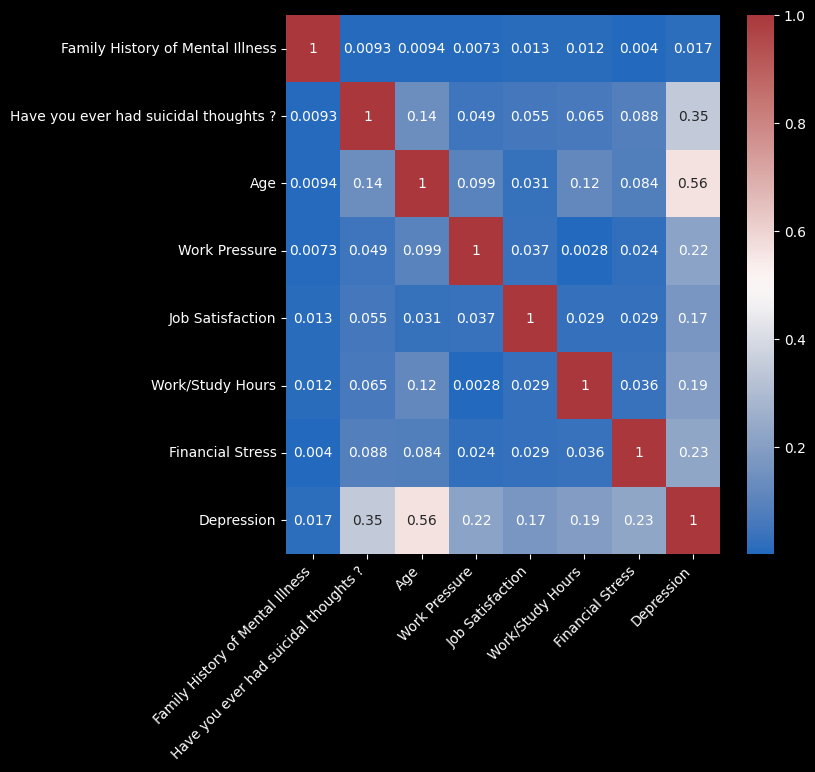

In [496]:
plt.figure(figsize=(7,7))
sns.heatmap(processed_data[YES_NO_COLS + NUM_COLS + [TARGET]].corr().abs(), cmap='vlag', annot=True)
plt.xticks(rotation=45, ha='right')

In [497]:
def annot_plot(ax):
    for i in ax.containers:
        ax.bar_label(i)

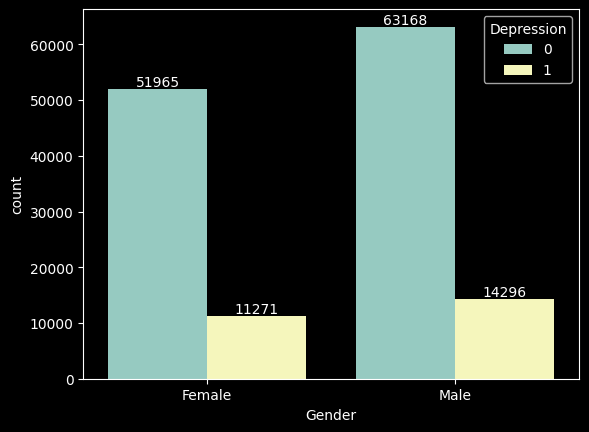

In [498]:
ax = sns.countplot(data=processed_data, x='Gender', hue='Depression')
annot_plot(ax)

## Depressed Population Exploration

In [499]:
dprsd_df = train_data.loc[train_data[TARGET] == 1]
dprsd_df.head()

,Name,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
id,,,,,,,,,,,,,,,,
1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,4.0,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,NaN,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,5.0,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
15,Aditi,Female,23.0,Patna,Working Professional,Marketing Manager,2.0,2.0,5-6 hours,Healthy,MA,Yes,6.0,4.0,Yes,1
27,Aarav,Male,50.0,Ghaziabad,Working Professional,HR Manager,5.0,3.0,Less than 5 hours,Healthy,MA,Yes,12.0,5.0,Yes,1


In [500]:
dprsd_df['Profession'].value_counts()

Profession
Teacher                   1386
Architect                  433
HR Manager                 430
Graphic Designer           216
Educational Consultant     213
Consultant                 199
Data Scientist             186
Judge                      186
Business Analyst           179
Doctor                     172
Lawyer                     166
Content Writer             146
Manager                    142
Chef                       139
Financial Analyst          131
Civil Engineer             119
Mechanical Engineer        119
Plumber                    112
Pharmacist                 104
Marketing Manager          100
Pilot                       98
Researcher                  94
Customer Support            93
Software Engineer           93
Accountant                  86
Travel Consultant           86
Chemist                     84
Sales Executive             82
Electrician                 66
Digital Marketer            62
Entrepreneur                62
UX/UI Designer              

### Professional or Student 

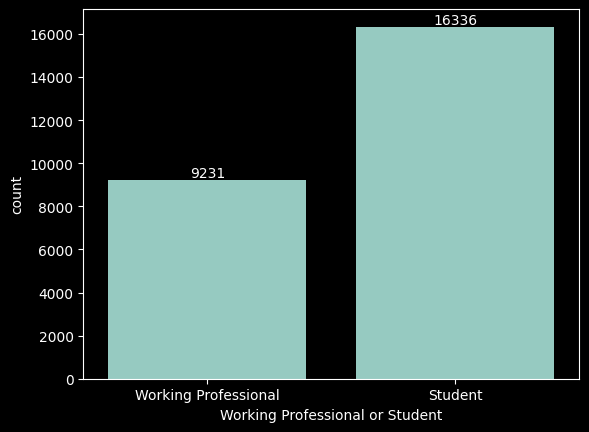

In [501]:
ax = sns.countplot(dprsd_df, x='Working Professional or Student', )
annot_plot(ax)

### Work Pressure

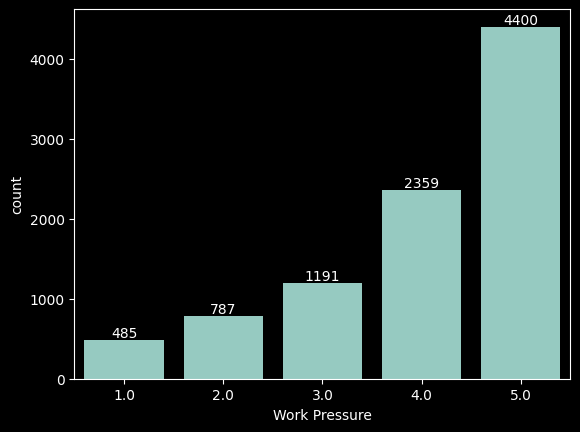

In [502]:
ax = sns.countplot(dprsd_df, x='Work Pressure')
annot_plot(ax)

### Job Satisfaction

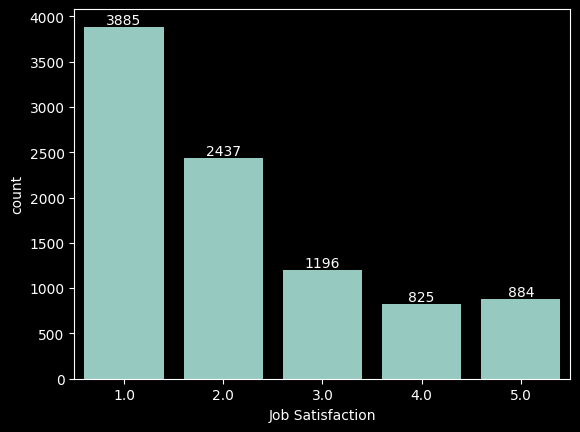

In [503]:
ax = sns.countplot(dprsd_df, x='Job Satisfaction')
annot_plot(ax)

### Work/Study Hours

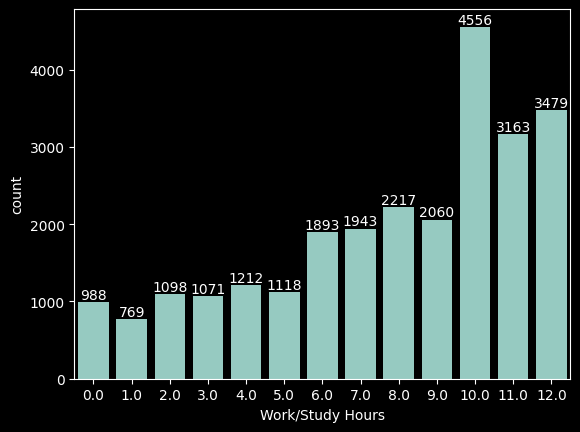

In [504]:
ax = sns.countplot(dprsd_df, x='Work/Study Hours')
annot_plot(ax)

### Financial Stress

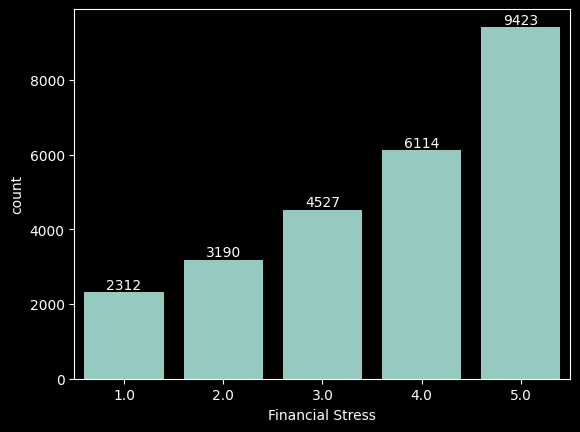

In [505]:
ax = sns.countplot(dprsd_df, x='Financial Stress')
annot_plot(ax)

### Family History of Mental Illness

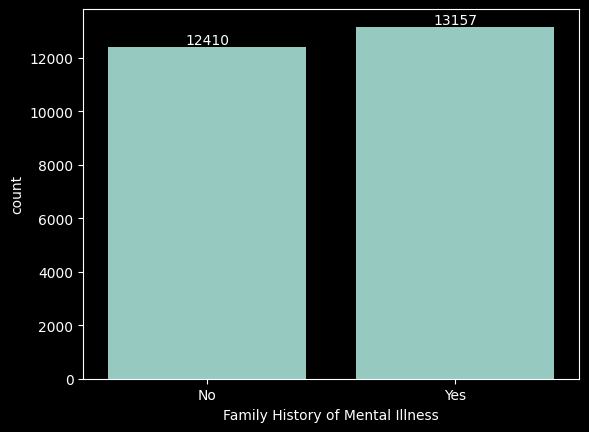

In [506]:
ax = sns.countplot(dprsd_df, x='Family History of Mental Illness')
annot_plot(ax)

### Have you ever had suicidal thoughts ?

<Axes: xlabel='Have you ever had suicidal thoughts ?', ylabel='count'>

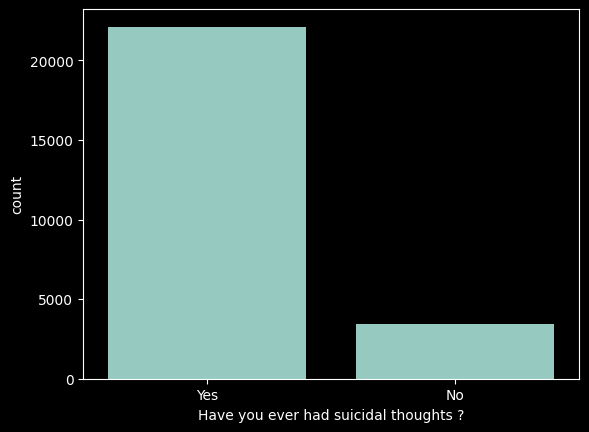

In [507]:
sns.countplot(dprsd_df, x='Have you ever had suicidal thoughts ?')